###    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Python Assignment 2 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Effects of education on wages</h2>

<h2 style="text-align: center;" markdown="1">Jerry Hong</h2>


## Package setup

In [1]:
# import necessary packages

import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.optimize import minimize


Download the [PSID 1982 dataset](https://www.wiley.com/legacy/wileychi/baltagi/supp/WAGES.xls) and save as a CSV. This is cross-sectional data originating from the [Panel Study on Income Dynamics](https://psidonline.isr.umich.edu/), 1982. In this assignment, we will use this data to investigate the effect of eduction on wages for this population. 

Let's first investigate our data and a few relationships in it. This is a little of what I call the "motivation" part of your regression analysis. This is very simple- you will have to do more involved things in your final project. 

* First, check [here](https://rdrr.io/cran/AER/man/PSID1982.html) to see what each variable means. Find the path of where you save this data set in your computer and import it into your Jupyter notebook.

* Then create two tables to show the proportion of women and men in the dataset and the proportion of people that reside in a standard metropolitan statistical area. (smsa variable)

* Create a third table, the cross reference table for these two variables.  

## Import the dataset as a CSV

In [2]:
# Note: this will be your own file path
stats = pd.read_csv(r"C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Spring 2023\ECON 320\LAB\Data\PSID1982.csv")
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  595 non-null    int64 
 1   experience  595 non-null    int64 
 2   weeks       595 non-null    int64 
 3   occupation  595 non-null    object
 4   industry    595 non-null    object
 5   south       595 non-null    object
 6   smsa        595 non-null    object
 7   married     595 non-null    object
 8   gender      595 non-null    object
 9   union       595 non-null    object
 10  education   595 non-null    int64 
 11  ethnicity   595 non-null    object
 12  wage        595 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 60.6+ KB


## Create `gender` tables

1. Frequency table showing the **number** of respondents with each gender
2. Proportion table showing the what **portion** of respondents are for each gender

In [3]:
#create and print a gender frequency table 
table1_pd = stats.gender.value_counts()
print(f'freq table: \n{table1_pd}\n')

#find the proportions of each each gender and print this table
prop_gender = stats.gender.value_counts(normalize=True)
print(f'prop table: \n{prop_gender}\n')

freq table: 
male      528
female     67
Name: gender, dtype: int64

prop table: 
male      0.887395
female    0.112605
Name: gender, dtype: float64



## Create `smsa` tables

1. Frequency table showing the **number** of respondents that do or do not live in an "SMSA"
2. Proportion table showing the what **portion** of respondents do or do not live in an "SMSA"

In [4]:
# create and print a table showing how many respondents do or do not live in a "SMSA"
table2_pd = stats.smsa.value_counts()
print(f'freq table: \n{table2_pd}\n')

# find the proportions of the above figures
prop_smsa = stats.smsa.value_counts(normalize=True)
print(f'prop table: \n{prop_smsa}\n')

freq table: 
yes    382
no     213
Name: smsa, dtype: int64

prop table: 
yes    0.642017
no     0.357983
Name: smsa, dtype: float64



## Add a [cross table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) using `gender` and `smsa`

In [5]:
# create a cross table to show proportions of each group
crosstab = pd.crosstab(stats.gender, stats.smsa, normalize=True)
crosstab

smsa,no,yes
gender,,
female,0.023529,0.089076
male,0.334454,0.552941


## Add a correlation table using `wage`,`education`, and `experience`

* The following table looks at the correlation table between wages education and experience. 
* What can you say about this correlations? Do they have the expected sign?

In [6]:
# slice the data for the desired variables
cormat = stats[['wage', 'education', 'experience']]

# create a correlation matrix
round(cormat.corr(), 3)

,wage,education,experience
wage,1.000,0.441,0.090
education,0.441,1.000,-0.222
experience,0.090,-0.222,1.000


### Observations
The correlations among the variables are fairly weak. For the most part, the signs are what I expected. For example, education and wage have a positive correlation as I expected. One I did not expect is the relatively negative correlation between education and experience. My initial thought is that it should also be positive albeit not as strong as the other variables. 

## Find averages of relevant variables and some statistics by gender


1. Look at the averages for the whole sample for wage, education, and experience

2. Calculate the above averages, now separated by gender. Add the correlation between wage and education by gender.  


* What can you say about these results? 

* What can you say about the average values for women vs men? 


In [7]:
# select the relevant variables and find their mean
averages = np.mean(stats[['wage', 'education', 'experience']])

# round the averages and label the columns
avg_col = pd.DataFrame(averages, columns=['Averages'])
# print
round(avg_col,3)

c:\Users\jerry\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Averages
wage,1148.039
education,12.845
experience,22.854


In [8]:
# calculate the averages, separated by gender
bygender = stats.groupby(['gender'])[['wage', 'education', 'experience']].mean()

# calculate the correlation between education and wage for each gender
corrwage_educ = stats.groupby(['gender'])[['wage','education']].corr().unstack().iloc[:,1]

# attach this to your table
bygender['corrwadge_educ'] = corrwage_educ
bygender



,wage,education,experience,corrwadge_educ
gender,,,,
female,735.820896,12.835821,20.014925,0.670763
male,1200.346591,12.846591,23.214015,0.449465


## Observations

The first thing that caught my attention was the difference in average wage between males and females. Males earn a little more than the overall average while females earn roughly 36 percent below average. Interestingly, both males and females have about the same education level. Also worth noting is that the correlation between wage and education is stronger for females than males despite the lesser pay. 

# Graphs 

Let's look at those numbers using graphs. 

## Plot wages as a function of education 

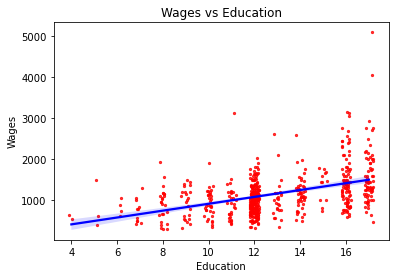

In [9]:
# use help(sns.regplot()) check the documentation for this function 
# use line_kws= {'color':'blue'} to change color of the line
# scatter_kws={'color':'red', 's':5} to change color and size of dots

%matplotlib inline
sns.regplot(x='education', y='wage', data=stats, x_jitter = 0.2,line_kws= {'color':'blue'},
                        scatter_kws={'color':'red', 's':5}).set(title= 'Wages vs Education',
                                                  xlabel="Education", ylabel = "Wages", 
                                                  );


## Plot wages as a function of education, separated by gender

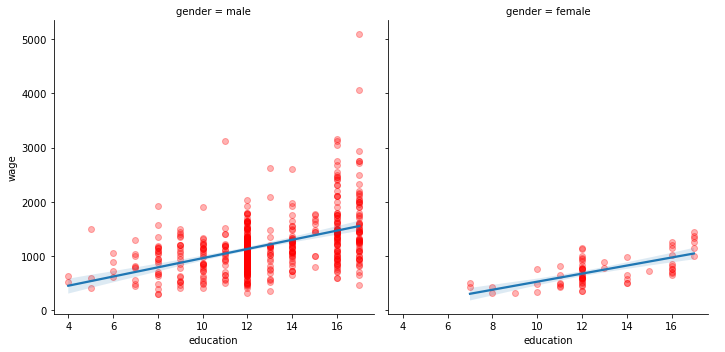

In [16]:
# same plot but now split by gender
sns.lmplot(x='education', y='wage', col='gender', scatter_kws={'color':'red','alpha':0.3}, 
        data=stats).add_legend();


# Simple regression analysis

Now let's use the data to estimate the following equation
$$ wage = \beta_0 + \beta_1*education + u $$

Estimate this equation using the step by step method learned last class, the method that minimizes SSR and the variance covarance method. (3 ways first)

### Equation system results: step-by-step

In [11]:
# select your x and y variables
x = stats['education']
y = stats['wage']

# ingredients to the OLS formulas:
sumxy = np.sum((x - np.mean(x))*(y - np.mean(y)))
sumx2 = np.sum((x - np.mean(x))**2)
sumy2 = np.sum((y - np.mean(y))**2)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 83.88785655141531

b0: 70.4674157605591



### Function minimization results 


In [17]:
# initialize beta parameters
b = np.array([0.5,0.5])
# create column of constants
k = np.ones(len(x))
# create function for sum of square residuals
def sse(b,y,x,k):
    return np.sum((y-b[0]*k-b[1]*x)**2)
# find the parameters that minimize SSR
resa = minimize(fun=sse, args=(y,x,k), x0=b)

# print results
print(resa['x'])

[70.46925847 83.88772698]


### Covariance , variance method
Using the `np.cov(x,y)` and `np.var(x)` functions in Python calculate the $\hat\beta_0, \hat\beta_1$ based on the equation below.
$$\hat\beta_1=\frac{Cov(x,y)}{Var(x)}$$ 
$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$

In [13]:
# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1,0]
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 83.8878565514152

b0: 70.4674157605607



### `ols()` command 

Finally use the `ols()` command to estimate save your estimation in an object called reg and show the summary of your model. 
$$ log(wage) = \beta_0 + \beta_1*education + u $$
What can you say about these new results? Why is it better to use $log(wages)$?
What is your interpretation of the coeficients and the $R^2$?

In [14]:
# estimate log-level model:
reg = smf.ols(formula='np.log(y) ~ x', data=stats)
results = reg.fit()
results.summary()

# Put all vectors into a data frame to work with it later 
# and becasue you need that format for the graphs
table = pd.DataFrame({'b': round(results.params, 3),
                      'se': round(results.bse, 3),
                      't': round(results.tvalues, 3),
                      'pval': round(results.pvalues, 3)})

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     156.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.64e-32
Time:                        19:23:47   Log-Likelihood:                -283.58
No. Observations:                 595   AIC:                             571.2
Df Residuals:                     593   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0292      0.075

### Observations 
The estimated model is $$\widehat{log(wage)} = 6.03 + 0.072 * education$$ with 595 observations and an R-squared value of 0.208. I was a little surprise of how little education explains the variation of wage due to its small R-squared value. I think we generally assume that education plays an important role in wages, but our analysis claims otherwise. I think one of the reasons we should use log wages is to normalize the distribution of the dependent variable. In addition, it gives a better interpretation of how much the change in education affects wage on a per-unit basis, specifically on a percentage-basis. The coefficient of the model suggests that a one-unit increase in education leads to about a seven percent increase in wage. 

<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

`wooldridge`  
`matplot.lib`  
`pandas`  
`numpy`    
`seaborn`   
`statsmodels.formula.api`    
`scipy.stats`  
`scipy.optimize`   
    

</div>

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>


&nbsp;

In [23]:
!jupyter nbconvert --to html Econ320Lab_Assign2_v1_empty.ipynb
#!jupyter nbconvert --to html --TemplateExporter.exclude_input=True Econ320Lab_Assign1_v2.ipynb


[NbConvertApp] Converting notebook Econ320Lab_Assign2_v1_empty.ipynb to html
[NbConvertApp] Writing 692782 bytes to Econ320Lab_Assign2_v1_empty.html
